In [356]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
import nltk
import pandas_profiling
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML

[nltk_data] Downloading package punkt to C:\Users\Rajat
[nltk_data]     Gaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rajat Gaur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [398]:
prop = pd.read_excel("C:/Users/Rajat Gaur/Desktop/Python project/Property Data Compiled.xlsx")
prop.head()

,PropID,Property Name,Star Rating,Energy Star,LEED Certified,Building Status,Secondary Type,Market Name,Submarket Name,City,...,2024 Pop Age 75-79(1m),2024 Pop Age 80-84(1m),2024 Pop Age 85+(1m),Situs_Num,Situs_Num_Remainder,SITUS_DIR,SITUS_NAM,SCP,SCSitus_NumNam,SCAPN
0,P1,The Reserve at Johns Creek Walk,4,NaN,NaN,Existing,Apartments,Atlanta,Outlying Fulton County MF,Johns Creek,...,344.0,176.0,134.0,NaN,NaN,NaN,NaN,GA Fulton The Reserve at Johns Creek Walk,NaN,GA Fulton 11-1000-0359-034
1,P2,8West,4,NaN,NaN,Under Construction,Apartments,Atlanta,Upper West Side MF,Atlanta,...,184.0,102.0,85.0,NaN,NaN,NaN,NaN,GA Fulton 8West,NaN,GA Fulton 14-0112-0003-061-5
2,P3,Eighth Street Apartments,4,NaN,NaN,Existing,Dormitory,Atlanta,Upper West Side MF,Atlanta,...,169.0,89.0,68.0,NaN,NaN,NaN,NaN,GA Fulton Eighth Street Apartments,NaN,GA Fulton 17-0149-0008-098-2
3,P4,Post Parkside ATL,4,NaN,NaN,Existing,Apartments,Atlanta,Piedmont Park MF,Atlanta,...,654.0,370.0,313.0,NaN,NaN,NaN,NaN,GA Fulton Post Parkside ATL,NaN,GA Fulton 17-0106-0009-120-4
4,P5,100 Midtown,3,NaN,NaN,Existing,Apartments,Atlanta,Central Midtown MF,Atlanta,...,508.0,279.0,222.0,NaN,NaN,NaN,NaN,GA Fulton 100 Midtown,NaN,GA Fulton 17-0107-0006-060-4


In [358]:
prop.shape

(20363, 209)

In [359]:
prop_new = prop

In [360]:
for i in [16, 18, 21, 22, 37, 47, 106]:
    prop.iloc[:,i]=prop.iloc[:,i].fillna(prop.iloc[:,i].groupby(prop.loc[:,'Zip']).transform('median'))
    prop.iloc[:,i]=prop.iloc[:,i].fillna(prop.iloc[:,i].groupby(prop.loc[:,'City']).transform('median'))
    prop.iloc[:,i]=prop.iloc[:,i].fillna(prop.iloc[:,i].groupby(prop.loc[:,'State']).transform('median'))
prop.iloc[:,49]=prop.iloc[:,49].fillna(prop.iloc[:,49].mode()[0])

In [361]:
prop['Avg Effective/SF'].min()

0.19

In [362]:
prop = prop[prop['Avg Effective/SF']>=(prop['Avg Effective/SF'].quantile(.5))]
prop['Avg Effective/SF'].min()

1.16

In [363]:
prop = prop.iloc[:,[16, 18, 21, 22, 37, 47, 49, 106]]
prop.head()

,Number Of Stories,Number Of Units,Vacancy %,Avg Unit SF,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Construction Material,Year Built
0,3.0,210,4.29,1157.0,230.0,39.2025,Masonry,2006.0
3,4.0,188,4.79,942.0,230.0,0.4500,Masonry,1999.0
4,9.0,118,11.02,1068.0,100.0,0.3000,Reinforced Concrete,1968.0
6,2.0,129,5.97,483.0,12.0,0.4400,Masonry,1959.0
7,22.0,198,10.10,1259.0,200.0,0.5200,Reinforced Concrete,2017.0


In [364]:
prop.shape

(8572, 8)

In [365]:
prop['Size'] = prop['Number Of Units']*prop['Avg Unit SF']
prop['Age'] = 2019 - prop['Year Built']
prop.head()

,Number Of Stories,Number Of Units,Vacancy %,Avg Unit SF,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Construction Material,Year Built,Size,Age
0,3.0,210,4.29,1157.0,230.0,39.2025,Masonry,2006.0,242970.0,13.0
3,4.0,188,4.79,942.0,230.0,0.4500,Masonry,1999.0,177096.0,20.0
4,9.0,118,11.02,1068.0,100.0,0.3000,Reinforced Concrete,1968.0,126024.0,51.0
6,2.0,129,5.97,483.0,12.0,0.4400,Masonry,1959.0,62307.0,60.0
7,22.0,198,10.10,1259.0,200.0,0.5200,Reinforced Concrete,2017.0,249282.0,2.0


In [366]:
prop = prop.drop(['Number Of Units','Avg Unit SF','Year Built'], axis=1)
prop.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Construction Material,Size,Age
0,3.0,4.29,230.0,39.2025,Masonry,242970.0,13.0
3,4.0,4.79,230.0,0.4500,Masonry,177096.0,20.0
4,9.0,11.02,100.0,0.3000,Reinforced Concrete,126024.0,51.0
6,2.0,5.97,12.0,0.4400,Masonry,62307.0,60.0
7,22.0,10.10,200.0,0.5200,Reinforced Concrete,249282.0,2.0


In [367]:
dummy = pd.get_dummies(prop['Construction Material'])
dummy.head()

,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
6,1,0,0,0,0
7,0,0,1,0,0


In [368]:
prop = pd.concat([prop, dummy],axis=1)
prop.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Construction Material,Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,3.0,4.29,230.0,39.2025,Masonry,242970.0,13.0,1,0,0,0,0
3,4.0,4.79,230.0,0.4500,Masonry,177096.0,20.0,1,0,0,0,0
4,9.0,11.02,100.0,0.3000,Reinforced Concrete,126024.0,51.0,0,0,1,0,0
6,2.0,5.97,12.0,0.4400,Masonry,62307.0,60.0,1,0,0,0,0
7,22.0,10.10,200.0,0.5200,Reinforced Concrete,249282.0,2.0,0,0,1,0,0


In [369]:
prop = prop.drop(['Construction Material'], axis=1)
prop.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0
3,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0
4,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0
6,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0
7,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0


In [370]:
prop.shape

(8572, 11)

In [371]:
matrix = prop.as_matrix()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5594632829860353
For n_clusters = 3 The average silhouette_score is : 0.5683067938431251
For n_clusters = 4 The average silhouette_score is : 0.5447721493636984
For n_clusters = 5 The average silhouette_score is : 0.5378621225771635
For n_clusters = 6 The average silhouette_score is : 0.5461550847166128
For n_clusters = 7 The average silhouette_score is : 0.5427959538350656
For n_clusters = 8 The average silhouette_score is : 0.529082087576318
For n_clusters = 9 The average silhouette_score is : 0.5334975917027626


In [372]:
n_clusters = 3
silhouette_avg = -1
while silhouette_avg < 0.55:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5683067938431251


In [373]:
prop.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0
3,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0
4,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0
6,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0
7,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0


In [374]:
pd.Series(clusters).value_counts()

0    4201
2    3811
1     560
dtype: int64

In [375]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
#     plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

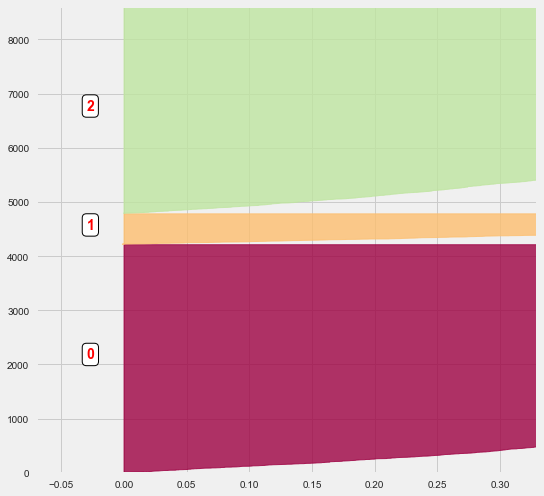

In [376]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(prop), sample_silhouette_values, clusters)

In [377]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

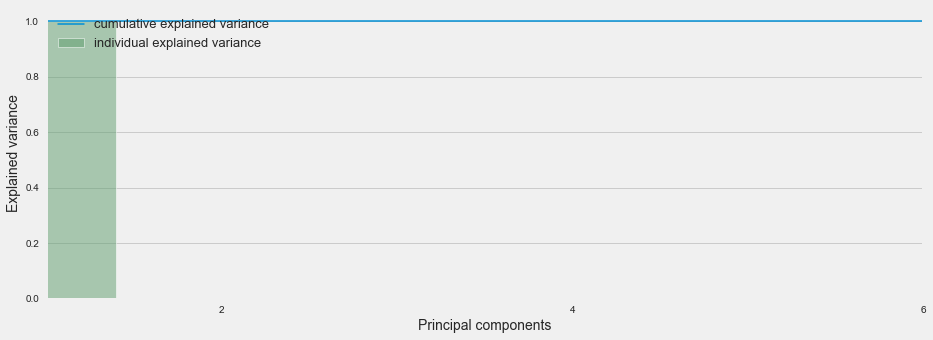

In [378]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 5)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [379]:
pca = PCA(n_components=10)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

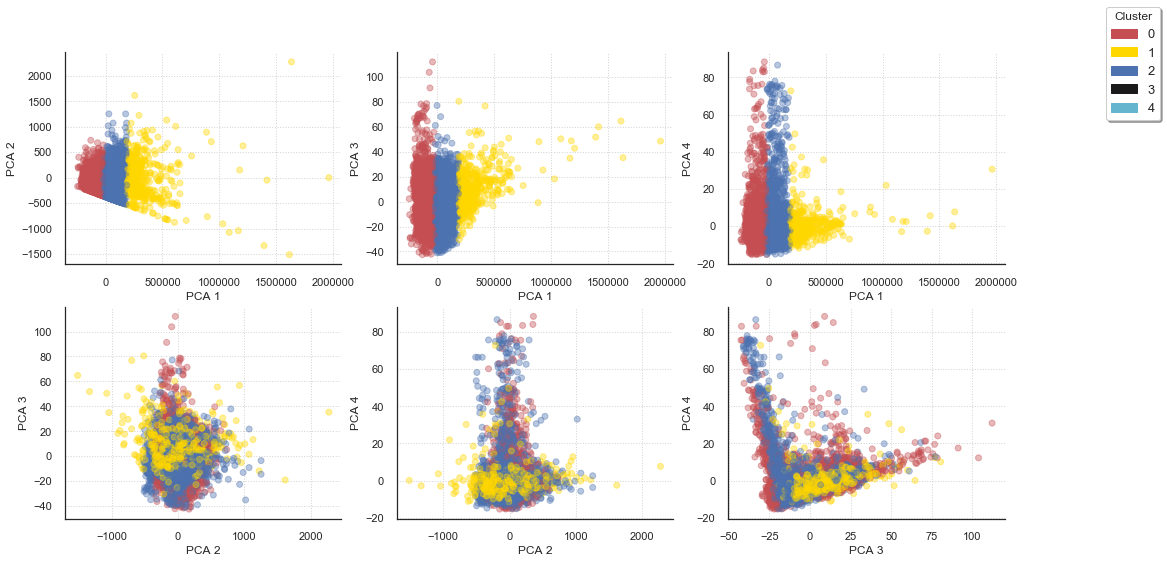

In [380]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

In [381]:
prop.shape

(8572, 11)

In [382]:
prop.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0
3,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0
4,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0
6,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0
7,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0


In [383]:
idx = list(range(0,prop.shape[0]))
prop1 = prop
prop1['index_col'] = idx
prop1

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame,index_col
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0,0
3,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0,1
4,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0,2
6,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0,3
7,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20341,4.0,3.22,424.0,19.8800,486864.0,3.0,0,0,1,0,0,8567
20345,3.0,9.20,860.0,5.1900,561600.0,20.0,0,0,0,0,1,8568
20346,4.0,8.14,625.0,16.7300,500016.0,11.0,0,0,1,0,0,8569
20357,4.0,3.91,195.0,19.0900,1639560.0,17.0,1,0,0,0,0,8570


In [384]:
prop1.reset_index(inplace = True)
prop1

,index,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame,index_col
0,0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0,0
1,3,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0,1
2,4,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0,2
3,6,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0,3
4,7,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8567,20341,4.0,3.22,424.0,19.8800,486864.0,3.0,0,0,1,0,0,8567
8568,20345,3.0,9.20,860.0,5.1900,561600.0,20.0,0,0,0,0,1,8568
8569,20346,4.0,8.14,625.0,16.7300,500016.0,11.0,0,0,1,0,0,8569
8570,20357,4.0,3.91,195.0,19.0900,1639560.0,17.0,1,0,0,0,0,8570


In [385]:
prop1 = prop1.drop(['index','index_col'], axis = 1)
prop1

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0
1,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0
2,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0
3,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0
4,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8567,4.0,3.22,424.0,19.8800,486864.0,3.0,0,0,1,0,0
8568,3.0,9.20,860.0,5.1900,561600.0,20.0,0,0,0,0,1
8569,4.0,8.14,625.0,16.7300,500016.0,11.0,0,0,1,0,0
8570,4.0,3.91,195.0,19.0900,1639560.0,17.0,1,0,0,0,0


In [386]:
clust = pd.DataFrame(clusters, columns = ['cluster'])
new = pd.concat([prop1,clust], axis = 1)
new.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame,cluster
0,3.0,4.29,230.0,39.2025,242970.0,13.0,1,0,0,0,0,2
1,4.0,4.79,230.0,0.4500,177096.0,20.0,1,0,0,0,0,0
2,9.0,11.02,100.0,0.3000,126024.0,51.0,0,0,1,0,0,0
3,2.0,5.97,12.0,0.4400,62307.0,60.0,1,0,0,0,0,0
4,22.0,10.10,200.0,0.5200,249282.0,2.0,0,0,1,0,0,2


In [387]:
new.shape

(8572, 12)

In [388]:
new.isnull().sum()

Number Of Stories                 0
Vacancy %                         0
Number Of Parking Spaces          0
Closest Transit Stop Dist (mi)    0
Size                              0
Age                               0
Masonry                           0
Metal                             0
Reinforced Concrete               0
Steel                             0
Wood Frame                        0
cluster                           0
dtype: int64

In [389]:
new0 = new[new.cluster==0]
new1 = new[new.cluster==1]
new2 = new[new.cluster==2]
new0.head()

,Number Of Stories,Vacancy %,Number Of Parking Spaces,Closest Transit Stop Dist (mi),Size,Age,Masonry,Metal,Reinforced Concrete,Steel,Wood Frame,cluster
1,4.0,4.79,230.0,0.45,177096.0,20.0,1,0,0,0,0,0
2,9.0,11.02,100.0,0.30,126024.0,51.0,0,0,1,0,0,0
3,2.0,5.97,12.0,0.44,62307.0,60.0,1,0,0,0,0,0
5,25.0,30.20,347.0,0.61,218295.0,2.0,0,0,1,0,0,0
6,7.0,6.60,300.0,13.50,168632.0,5.0,1,0,0,0,0,0


In [390]:
new0.profile_report().to_file(output_file="output0.html")
new1.profile_report().to_file(output_file="output1.html")
new2.profile_report().to_file(output_file="output2.html")

In [391]:
prop_new.shape

(20363, 209)

In [392]:
prop_new.head()

,PropID,Property Name,Star Rating,Energy Star,LEED Certified,Building Status,Secondary Type,Market Name,Submarket Name,City,...,2024 Pop Age 75-79(1m),2024 Pop Age 80-84(1m),2024 Pop Age 85+(1m),Situs_Num,Situs_Num_Remainder,SITUS_DIR,SITUS_NAM,SCP,SCSitus_NumNam,SCAPN
0,P1,The Reserve at Johns Creek Walk,4,NaN,NaN,Existing,Apartments,Atlanta,Outlying Fulton County MF,Johns Creek,...,344.0,176.0,134.0,NaN,NaN,NaN,NaN,GA Fulton The Reserve at Johns Creek Walk,NaN,GA Fulton 11-1000-0359-034
1,P2,8West,4,NaN,NaN,Under Construction,Apartments,Atlanta,Upper West Side MF,Atlanta,...,184.0,102.0,85.0,NaN,NaN,NaN,NaN,GA Fulton 8West,NaN,GA Fulton 14-0112-0003-061-5
2,P3,Eighth Street Apartments,4,NaN,NaN,Existing,Dormitory,Atlanta,Upper West Side MF,Atlanta,...,169.0,89.0,68.0,NaN,NaN,NaN,NaN,GA Fulton Eighth Street Apartments,NaN,GA Fulton 17-0149-0008-098-2
3,P4,Post Parkside ATL,4,NaN,NaN,Existing,Apartments,Atlanta,Piedmont Park MF,Atlanta,...,654.0,370.0,313.0,NaN,NaN,NaN,NaN,GA Fulton Post Parkside ATL,NaN,GA Fulton 17-0106-0009-120-4
4,P5,100 Midtown,3,NaN,NaN,Existing,Apartments,Atlanta,Central Midtown MF,Atlanta,...,508.0,279.0,222.0,NaN,NaN,NaN,NaN,GA Fulton 100 Midtown,NaN,GA Fulton 17-0107-0006-060-4


In [393]:
prop_new = prop_new.loc[(prop_new['Number Of Stories']<5) & (prop_new['Vacancy %']<15) & (prop_new['Number Of Parking Spaces']<1000)\
        & (prop_new['Closest Transit Stop Dist (mi)']<25) & ((prop_new['Number Of Units']*prop_new['Avg Unit SF']) <750000)\
        & ((2019 - prop_new['Year Built'])<35) & (prop_new['Construction Material'].isin(['Masonry', 'Wood Frame']))]

In [394]:
prop_new.shape

(7705, 209)

In [396]:
prop_new['Avg Effective/SF'].median()

1.2

In [397]:
prop_new['Avg Effective/SF'].mean()

1.2592302955665022

In [399]:
prop.shape

(20363, 209)

In [400]:
prop['Avg Effective/SF'].median()

1.16

In [401]:
prop['Avg Effective/SF'].mean()

1.2590407616780719

In [411]:
for i in [10,20,25,30,40,50,60,70,75,80,90]:
    print("Prop", i,"th quantile:", prop['Avg Effective/SF'].quantile(i/100))
    print("Prop_new", i,"th quantile:", prop_new['Avg Effective/SF'].quantile(i/100))

Prop 10 th quantile: 0.81
Prop_new 10 th quantile: 0.81
Prop 20 th quantile: 0.92
Prop_new 20 th quantile: 0.95
Prop 25 th quantile: 0.97
Prop_new 25 th quantile: 1.0
Prop 30 th quantile: 1.01
Prop_new 30 th quantile: 1.04
Prop 40 th quantile: 1.09
Prop_new 40 th quantile: 1.13
Prop 50 th quantile: 1.16
Prop_new 50 th quantile: 1.2
Prop 60 th quantile: 1.24
Prop_new 60 th quantile: 1.28
Prop 70 th quantile: 1.34
Prop_new 70 th quantile: 1.36
Prop 75 th quantile: 1.4
Prop_new 75 th quantile: 1.41
Prop 80 th quantile: 1.48
Prop_new 80 th quantile: 1.47
Prop 90 th quantile: 1.73
Prop_new 90 th quantile: 1.64
